In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from node2vec import Node2Vec
import pandas as pd

In [2]:
graph = nx.Graph()

with open ("../Data/yeast/BioGRID.txt", "r") as inputFile:
    graph.add_edges_from([line.strip().split("\t") for line in inputFile])

In [3]:
print("Broj cvorova:", len(graph.nodes()))
print("Broj grana:", len(graph.edges()))

Broj cvorova: 5640
Broj grana: 59748


In [4]:
print("Broj komponenti povezanosti:", len(list(nx.connected_components(graph))))

Broj komponenti povezanosti: 1


In [5]:
with open ("../Data/yeast/disprotYeast194.txt", "r") as inputFile:
    disProt = [line.strip() for line in inputFile]

In [6]:
#disProt

In [7]:
oneDegreeNodes = []

for node in graph.nodes():
    if nx.degree(graph, node) == 1:
        oneDegreeNodes.append(node)
        
len(oneDegreeNodes)

466

In [8]:
for node in oneDegreeNodes:
    if node in disProt:
        print(node)

YPL241C


In [9]:
graph.remove_nodes_from(oneDegreeNodes)

In [10]:
print("Broj cvorova nakon brisanja:", len(graph.nodes()))
print("Broj grana nakon brisanja:", len(graph.edges()))

Broj cvorova nakon brisanja: 5174
Broj grana nakon brisanja: 59282


In [11]:
nDisProt = 0
for node in graph.nodes():
    if(node in disProt):
        nDisProt += 1
        
print("Broj IDP u podgrafu:", nDisProt)

Broj IDP u podgrafu: 193


In [12]:

node2vec = Node2Vec(graph, dimensions=64)

model = node2vec.fit()

embeddings = {node: model.wv[str(node)] for node in graph.nodes()}


Computing transition probabilities:   0%|          | 0/5174 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|███████████████████████████████████████████████████████| 10/10 [01:26<00:00,  8.67s/it]


In [13]:

columns = [f"column{i}" for i in range(1, node2vec.dimensions + 1)]
columns.insert(0, "node")
columns.insert(0, "label")


In [14]:
def assignLabel(node, IDPs):
    if node in IDPs:
        return 1
    return 0

In [15]:

pandasData = []

for node in embeddings:
    nodeEmbeding = []
    nodeEmbeding.append(node)
    nodeEmbeding.insert(0, assignLabel(node, disProt))
    nodeEmbeding += list(embeddings[node])
    pandasData.append(nodeEmbeding)
    
len(pandasData[0])


66

In [16]:

dataFrame = pd.DataFrame(pandasData, columns=columns)
dataFrame


,label,node,column1,column2,column3,column4,column5,column6,column7,column8,...,column55,column56,column57,column58,column59,column60,column61,column62,column63,column64
0,1,YDR143C,0.264337,-0.672488,0.653370,0.363412,-0.277810,0.108381,-0.013809,-0.004831,...,0.568153,-0.058000,-0.091948,-0.552148,-0.298385,-0.032578,-0.057797,-0.610445,-0.018447,0.161453
1,0,YER068W,-0.224409,-0.136508,0.936373,0.244727,-0.043280,0.579259,-0.429337,-0.427267,...,0.073515,0.001301,0.174942,-0.768384,-0.054959,0.010148,-0.160185,-0.995914,0.808627,0.000017
2,0,YMR207C,0.162677,0.051863,0.520633,-0.297130,0.184726,0.150719,0.465480,0.011404,...,0.125378,-0.037138,-0.798875,-0.611004,-0.355110,-0.117123,-0.230197,-0.001158,-0.234731,-0.051842
3,1,YNR016C,0.479655,-0.726925,0.393140,-0.370999,0.138517,-0.144020,0.409745,0.060321,...,-0.357413,0.420698,-0.405116,0.017478,0.161619,0.322608,-0.512104,0.117932,-0.278319,-0.265109
4,0,YIL135C,0.525719,-0.356706,0.579049,-0.207804,0.148474,-0.921313,-0.171469,0.307072,...,0.114443,0.304926,0.022303,-0.207992,0.401416,-0.539356,0.245356,-0.385595,0.022809,0.243580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5169,0,YDR003W-A,-0.014408,0.131422,-0.087872,-0.174145,-0.034010,0.047411,0.211581,-0.206581,...,0.159216,-0.206757,0.181482,-0.456544,-0.611338,-0.144818,0.028903,-0.191085,-0.317775,-0.218524
5170,0,YDR042C,-0.171261,-0.511665,0.957663,-0.143029,-0.220164,-0.774347,-0.408155,0.544895,...,0.356533,0.033501,0.407118,-0.120660,-0.007827,0.073474,0.000064,0.220881,-0.088191,0.340137
5171,0,YGL057C,-0.395888,-0.171465,0.193495,0.311969,-0.140474,0.868995,0.434810,0.449968,...,-0.067615,-0.209308,0.559134,-0.496353,-0.357336,-0.016656,0.764958,0.310994,-0.161027,-0.173499
5172,0,YHR202W,1.321474,-0.232796,0.243782,-0.395230,0.210718,-0.149354,0.098660,0.085772,...,-0.340733,0.274378,0.190627,-0.099294,-0.335521,0.194292,-0.170449,-0.032788,0.369263,0.167272


In [17]:
#dataFrame.to_csv("../Data/Embedings/test_embeding_dimension32.csv")

In [18]:
degreeCentrality = nx.degree_centrality(graph)

In [19]:
#closenessCentrality = nx.closeness_centrality(graph)

In [20]:
closenessCentrality = {}

with open ("../Data/Centrality/closeness_centrality.txt", "r") as inputFile:
    for line in inputFile:
        fromNode, toNode = line.split("\t")
        closenessCentrality[fromNode] = float(toNode)

In [21]:
#with open("../Data/Centrality/closeness_centrality.txt", "w") as outputFile:
    #for node in closenessCentrality:
        #outputFile.write(f"{node}\t{closenessCentrality[node]}\n")

In [22]:
closenessCentrality

{'YDR143C': 0.45254133496631965,
 'YER068W': 0.3916862270008329,
 'YMR207C': 0.4294371575626764,
 'YNR016C': 0.43898506449422947,
 'YIL135C': 0.38270326255826,
 'YMR139W': 0.4190699935191186,
 'YNL316C': 0.4207059206245934,
 'YOL082W': 0.43861285399355604,
 'YHR211W': 0.3837252429345004,
 'YNL255C': 0.5385175931709348,
 'YJL125C': 0.3307121851425649,
 'YNL062C': 0.31736196319018406,
 'YDL014W': 0.4314068884997081,
 'YKL125W': 0.39130105900151285,
 'YJL218W': 0.35224022878932315,
 'YLR291C': 0.4020049735778676,
 'YLR448W': 0.4501784004873379,
 'YNL096C': 0.44495097195940136,
 'YLR075W': 0.4167069437731593,
 'YNL110C': 0.4392086941755816,
 'YHR135C': 0.4854086515905039,
 'YNL199C': 0.41450320512820515,
 'YJL092W': 0.4482668977469671,
 'YOR281C': 0.40426695842450766,
 'YGL173C': 0.46544898326435125,
 'YKL139W': 0.4200568412505075,
 'YER125W': 0.46138066357474133,
 'YPL115C': 0.37127682480442115,
 'YPL161C': 0.33486535473847745,
 'YEL002C': 0.37141010913268235,
 'YKL008C': 0.37726079346557

In [23]:
#betweennessCentrality = nx.betweenness_centrality(graph)

In [24]:
#with open("../Data/Centrality/betweenness_centrality.txt", "w") as outputFile:
    #for node in betweennessCentrality:
        #outputFile.write(f"{node}\t{betweennessCentrality[node]}\n")

In [25]:
betweennessCentrality = {}

with open ("../Data/Centrality/betweenness_centrality.txt", "r") as inputFile:
    for line in inputFile:
        fromNode, toNode = line.split("\t")
        betweennessCentrality[fromNode] = float(toNode)

In [26]:
#dataFrame = pd.read_csv("../Data/Embedings/test_embeding_01.csv")
#dataFrame

In [27]:
degreeCentralityList = []
closenessCentralityList = []
betweennessCentralityList = []
for node in dataFrame["node"]:
    degreeCentralityList.append(degreeCentrality[node])
    closenessCentralityList.append(closenessCentrality[node])
    betweennessCentralityList.append(betweennessCentrality[node])

In [28]:
#dataFrame["degree_centrality"] = degreeCentralityList
#dataFrame["closeness_centrality"] = closenessCentralityList
#dataFrame["betweenness_centrality"] = betweennessCentralityList
#dataFrame

In [29]:
x = dataFrame[dataFrame.columns[2::]]
x

,column1,column2,column3,column4,column5,column6,column7,column8,column9,column10,...,column55,column56,column57,column58,column59,column60,column61,column62,column63,column64
0,0.264337,-0.672488,0.653370,0.363412,-0.277810,0.108381,-0.013809,-0.004831,0.369365,-0.326807,...,0.568153,-0.058000,-0.091948,-0.552148,-0.298385,-0.032578,-0.057797,-0.610445,-0.018447,0.161453
1,-0.224409,-0.136508,0.936373,0.244727,-0.043280,0.579259,-0.429337,-0.427267,-0.103195,-0.126094,...,0.073515,0.001301,0.174942,-0.768384,-0.054959,0.010148,-0.160185,-0.995914,0.808627,0.000017
2,0.162677,0.051863,0.520633,-0.297130,0.184726,0.150719,0.465480,0.011404,0.033867,-0.482192,...,0.125378,-0.037138,-0.798875,-0.611004,-0.355110,-0.117123,-0.230197,-0.001158,-0.234731,-0.051842
3,0.479655,-0.726925,0.393140,-0.370999,0.138517,-0.144020,0.409745,0.060321,-0.025849,-0.436096,...,-0.357413,0.420698,-0.405116,0.017478,0.161619,0.322608,-0.512104,0.117932,-0.278319,-0.265109
4,0.525719,-0.356706,0.579049,-0.207804,0.148474,-0.921313,-0.171469,0.307072,-0.107875,-0.351060,...,0.114443,0.304926,0.022303,-0.207992,0.401416,-0.539356,0.245356,-0.385595,0.022809,0.243580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5169,-0.014408,0.131422,-0.087872,-0.174145,-0.034010,0.047411,0.211581,-0.206581,-0.106152,0.029369,...,0.159216,-0.206757,0.181482,-0.456544,-0.611338,-0.144818,0.028903,-0.191085,-0.317775,-0.218524
5170,-0.171261,-0.511665,0.957663,-0.143029,-0.220164,-0.774347,-0.408155,0.544895,-0.351696,0.460789,...,0.356533,0.033501,0.407118,-0.120660,-0.007827,0.073474,0.000064,0.220881,-0.088191,0.340137
5171,-0.395888,-0.171465,0.193495,0.311969,-0.140474,0.868995,0.434810,0.449968,-0.150009,-0.276549,...,-0.067615,-0.209308,0.559134,-0.496353,-0.357336,-0.016656,0.764958,0.310994,-0.161027,-0.173499
5172,1.321474,-0.232796,0.243782,-0.395230,0.210718,-0.149354,0.098660,0.085772,-0.082607,0.094272,...,-0.340733,0.274378,0.190627,-0.099294,-0.335521,0.194292,-0.170449,-0.032788,0.369263,0.167272


In [30]:
y = dataFrame["label"]
#y

In [31]:
import imblearn as im
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from collections import Counter
from sklearn.decomposition import PCA
import numpy as np

def report_imbalanced(model, x, y, text = "training"):
    y_pred = model.predict(x)
    
    print("Classification report for model {} on {} data".format(type(model).__name__, text))
    print("---------------------------------------------------------------------------------")
    print(classification_report_imbalanced(y, y_pred, zero_division=True))
    print("---------------------------------------------------------------------------------")
    
    print("Confusion matrix for model {} on {} data ".format(type(model).__name__, text))
    print("---------------------------------------------------------------------------------")
    print(pd.DataFrame(confusion_matrix(y, y_pred), columns=['B', 'M'], index=['B', 'M']))
    print("---------------------------------------------------------------------------------")

def resample(sampler, x, y):
    x_resampled, y_resampled = sampler.fit_resample(x, y)
    print("Number of instances before resampling with {} : {}. ".format(type(sampler).__name__,\
                                                                           Counter(y).items()))
    print("Number of instances after  resampling with {} : {}. ".format(type(sampler).__name__,\
                                                                           Counter(y_resampled).items()))
    return x_resampled, y_resampled

def visualize(x, x_resampled, y, y_resampled, x_opacity=0.5):
    
    pca = PCA(n_components=2)
    pca.fit(x)
    
    x_pca = pca.transform(x)
    x_resampled_pca = pca.transform(x_resampled) 
    
    x_stacked = [x_pca, x_resampled_pca]
    y_stacked = [y, y_resampled]
    
    fig = plt.figure(figsize=(20, 5))
    
    for i in range(2):
        ax = plt.subplot(1, 2, i + 1)
        colors = ['b' if y == 0 else 'r' for y in y_stacked[i]]
        alpha = [x_opacity if y == -1 else 1 - x_opacity for y in y_stacked[i]]
        plt.scatter(x_stacked[i][:, 0], x_stacked[i][:, 1], c=colors, alpha=alpha)
        plt.title('{} resampling'.format("After" if i else "Before"), c = 'blue' if i else 'green')
    plt.show()
    
def train_and_evaluate_model(model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    report_imbalanced(model, x_train, y_train, "training")
    report_imbalanced(model, x_test, y_test, "test")
    return model

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)

In [33]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)


In [34]:
'''
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy= 0.2, k_neighbors=2)
x_resampled, y_resampled = resample(smote, x_train, y_train)
visualize(x_train, x_resampled, y_train, y_resampled, 0)
''';

Number of instances before resampling with SMOTEENN : dict_items([(0, 3486), (1, 135)]). 
Number of instances after  resampling with SMOTEENN : dict_items([(0, 2535), (1, 1742)]). 


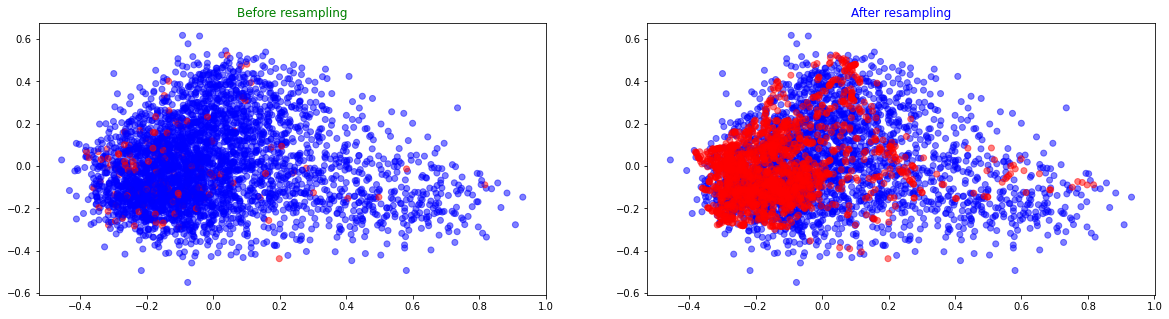

In [35]:

from imblearn.combine import SMOTEENN
smoteenn = SMOTEENN(sampling_strategy= 0.5)
x_resampled, y_resampled = resample(smoteenn, x_train, y_train)
visualize(x_train, x_resampled, y_train, y_resampled, 0.5)


In [36]:
'''
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_resampled)
x_resampled = pd.DataFrame(scaler.transform(x_resampled), columns=x_resampled.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)
''';

In [37]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': range(5, 20, 1),
          'weights': ['uniform', 'distance'],
          'p': [1, 2]
         }

In [38]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

estimator = GridSearchCV(KNeighborsClassifier(), param_grid=params, cv=5, scoring= "precision")
estimator.fit(x_resampled, y_resampled)
modelKNN = estimator.best_estimator_
modelGBC = GradientBoostingClassifier()
modelGBC.fit(x_train, y_train)
modelNBC = GaussianNB()
modelNBC.fit(x_resampled, y_resampled)
models = [modelKNN, modelGBC, modelNBC]
modelNames = ["KNN", "GBC", "NBC"]

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
f1Scores = []
recallScores = []
precisionScores = []
for model in models:
    y_test_pred = model.predict(x_test)
    f1Scores.append(f1_score(y_test, y_test_pred))
    precisionScores.append(precision_score(y_test, y_test_pred))
    recallScores.append(recall_score(y_test, y_test_pred))

In [40]:
data = {"Recall" : recallScores,
        "Precision:" : precisionScores,
        "F1" : f1Scores
       }

In [41]:
info = pd.DataFrame(data, index=modelNames)
info

,Recall,Precision:,F1
KNN,0.689655,0.091116,0.160966
GBC,0.051724,0.230769,0.084507
NBC,0.396552,0.067055,0.114713


In [42]:
y_pred_KNN = modelKNN.predict(x_test)
matrixKNN = pd.DataFrame(confusion_matrix(y_test, y_pred_KNN))
matrixKNN

,0,1
0,1096,399
1,18,40


In [ ]:
y_pred_GBC = 